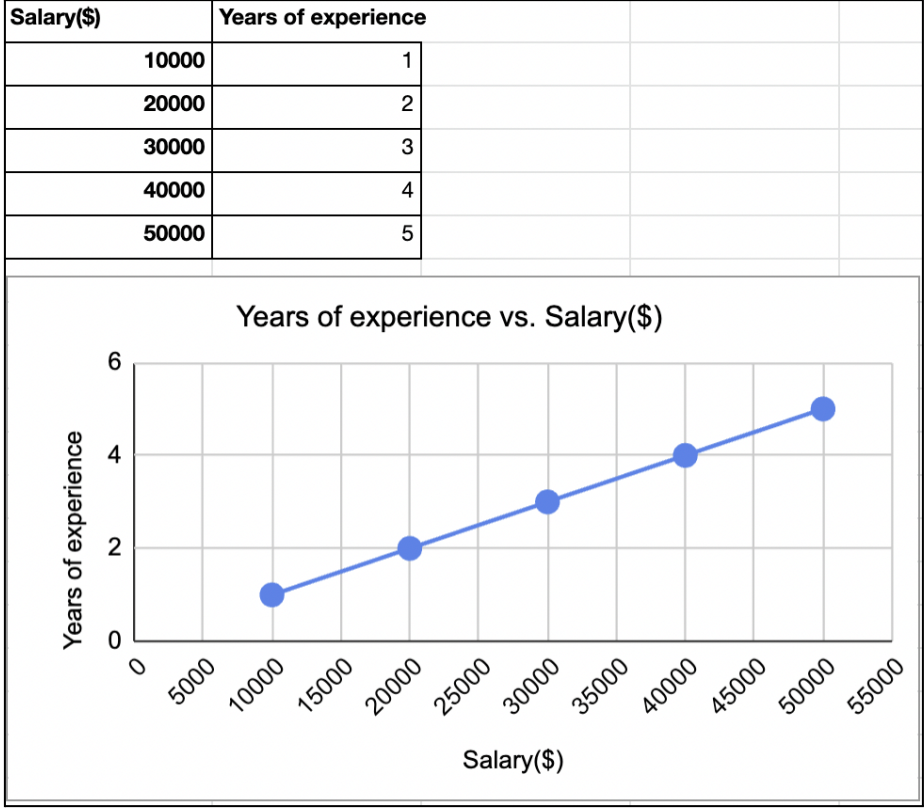

The above figure is an example of an ideal data and ideal regression line.

In [2]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("Credit.csv")
del df["Unnamed: 0"]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Text(0.5, 1.0, 'Scatterplot of Income vs Balance')

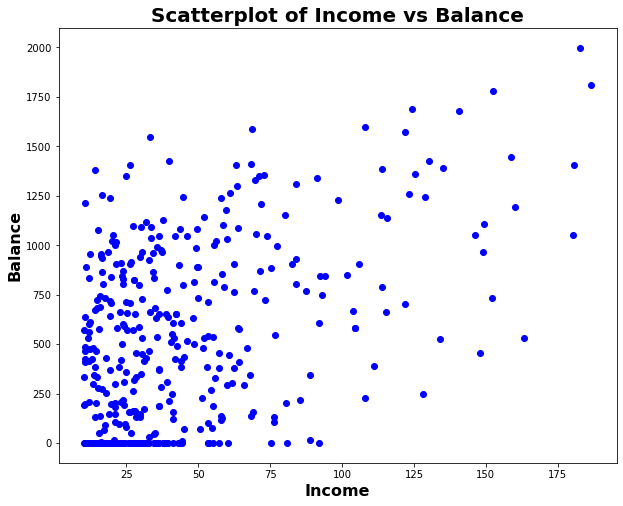

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel("Income")
plt.ylabel("Balance")
plt.scatter(df.Income, df.Balance, color="blue")
ax.set_xlabel("Income", fontsize=16, weight="bold")
ax.set_ylabel("Balance", fontsize=16, weight="bold")
ax.set_title(
    "Scatterplot of Income vs Balance",
    c="black",
    fontsize=20,
    weight="bold",
    loc="center",
)

In [5]:
# DATASET USED TO DEMONSTRATE LINEAR REGRESSION
df_cars = pd.read_csv("cars.csv")

In [6]:
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


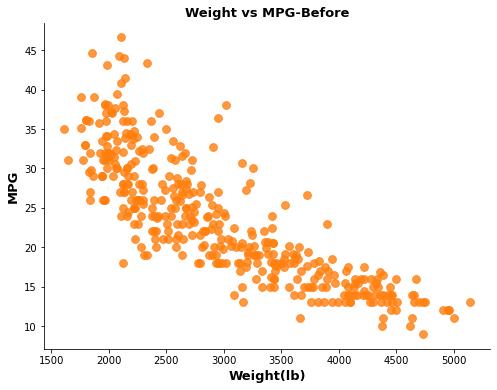

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_cars["WGT"], df_cars["MPG"], c="#FF7F0E", s=60, alpha=0.8)
ax.set_xlabel("Weight(lb)", size=13, fontweight="bold")
ax.set_ylabel("MPG", size=13, fontweight="bold")
ax.set_title("Weight vs MPG-Before", size=13, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

### Regression Line:


\begin{equation}
Y_i = \beta_0 + \beta_1 X_i
\end{equation}

\begin{equation}
MPG = \beta_0 + \beta_1 * WGT
\end{equation}

\begin{equation}
e_i = Y_i - \hat{Y_i} 
\end{equation}

\begin{equation}
SSE = \sum_{n=1}^{n} (Y_i - \hat{Y_i})^2
\end{equation}

### We find the intercept $ \beta_0 $ and Slope $\beta_1$ where the Sum of Squared Error is the least

In [8]:
from sklearn.linear_model import LinearRegression

X = df_cars[["WGT"]]
y = df_cars["MPG"]

reg = LinearRegression().fit(X, y)
print("Intercept: ", reg.intercept_)
print("Slope: ", reg.coef_)
print("R2: ", reg.score(X, y))

Intercept:  46.216524311509886
Slope:  [-0.00764734]
R2:  0.6926304310167515


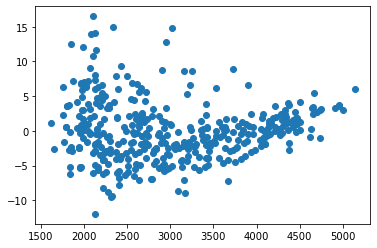

In [9]:
# PLOTTING ERRORS
plt.plot(X.values, y - reg.predict(X), "o")
plt.show()

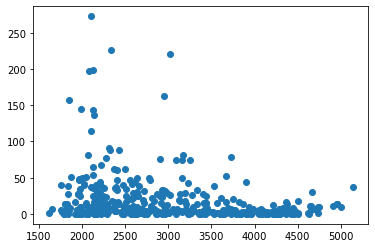

In [10]:
# PLOTTING SQUARED ERRORS
plt.plot(X.values, (reg.predict(X) - y) ** 2, "o")
plt.show()

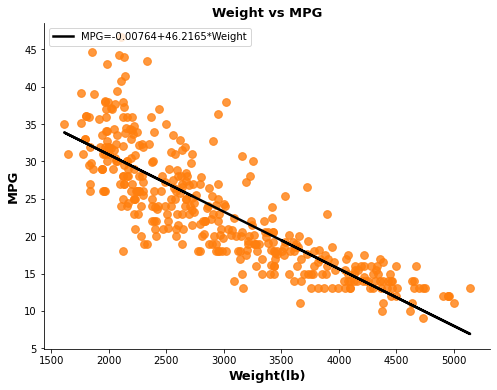

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df_cars["WGT"], df_cars["MPG"], c="#FF7F0E", s=60, alpha=0.8)
ax.set_xlabel("Weight(lb)", size=13, fontweight="bold")
ax.set_ylabel("MPG", size=13, fontweight="bold")
ax.set_title("Weight vs MPG", size=13, fontweight="bold")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
m, b = np.polyfit(df_cars["WGT"], df_cars["MPG"], 1)
plt.plot(
    df_cars["WGT"],
    m * df_cars["WGT"] + b,
    color="black",
    linewidth=2.5,
    label="MPG=-0.00764+46.2165*Weight",
)
plt.legend(loc="upper left")
plt.show()

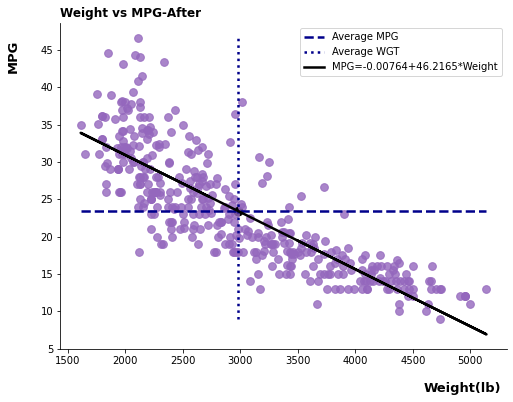

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
my = df_cars["MPG"].mean()
mx = df_cars["WGT"].mean()


wgt = df_cars["WGT"]
ax.hlines(
    y=my,
    xmin=wgt.min(),
    xmax=wgt.max(),
    colors="darkblue",
    linestyles="dashed",
    lw=2.5,
    label="Average MPG",
)
mpg = df_cars["MPG"]
ax.vlines(
    x=mx,
    ymin=mpg.min(),
    ymax=mpg.max(),
    colors="darkblue",
    linestyles="dotted",
    lw=2.5,
    label="Average WGT",
)


ax.scatter(mx, my, c="black", s=80)
my = 40
mx = 2000

ax.scatter(df_cars["WGT"], df_cars["MPG"], c="#9467BD", s=60, alpha=0.8)
m, b = np.polyfit(df_cars["WGT"], df_cars["MPG"], 1)
plt.plot(
    df_cars["WGT"],
    m * df_cars["WGT"] + b,
    color="black",
    linewidth=2.5,
    label="MPG=-0.00764+46.2165*Weight",
)
ax.legend(loc="upper right")
ax.legend(loc="upper right")
ax.set_xlabel("Weight(lb)", fontsize=13, weight="bold")
ax.set_ylabel("MPG", fontsize=13, weight="bold")
ax.set_title("Weight vs MPG-After", c="black", weight="bold", loc="left")
ax.xaxis.set_label_coords(0.9, -0.1)
ax.yaxis.set_label_coords(-0.09, 0.9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

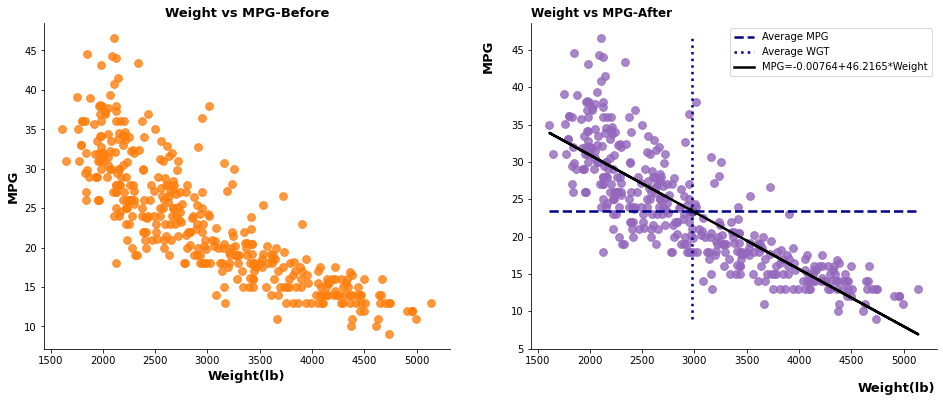

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax[0].scatter(df_cars["WGT"], df_cars["MPG"], c="#FF7F0E", s=60, alpha=0.8)
ax[0].set_xlabel("Weight(lb)", size=13, fontweight="bold")
ax[0].set_ylabel("MPG", size=13, fontweight="bold")
ax[0].set_title("Weight vs MPG-Before", size=13, fontweight="bold")
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)

my = df_cars["MPG"].mean()
mx = df_cars["WGT"].mean()


wgt = df_cars["WGT"]
ax[1].hlines(
    y=my,
    xmin=wgt.min(),
    xmax=wgt.max(),
    colors="darkblue",
    linestyles="dashed",
    lw=2.5,
    label="Average MPG",
)
mpg = df_cars["MPG"]
ax[1].vlines(
    x=mx,
    ymin=mpg.min(),
    ymax=mpg.max(),
    colors="darkblue",
    linestyles="dotted",
    lw=2.5,
    label="Average WGT",
)


ax[1].scatter(mx, my, c="black", s=80)
my = 40
mx = 2000

ax[1].scatter(df_cars["WGT"], df_cars["MPG"], c="#9467BD", s=60, alpha=0.8)
m, b = np.polyfit(df_cars["WGT"], df_cars["MPG"], 1)
plt.plot(
    df_cars["WGT"],
    m * df_cars["WGT"] + b,
    color="black",
    linewidth=2.5,
    label="MPG=-0.00764+46.2165*Weight",
)
ax[1].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[1].set_xlabel("Weight(lb)", fontsize=13, weight="bold")
ax[1].set_ylabel("MPG", fontsize=13, weight="bold")
ax[1].set_title("Weight vs MPG-After", c="black", weight="bold", loc="left")
ax[1].xaxis.set_label_coords(0.9, -0.1)
ax[1].yaxis.set_label_coords(-0.09, 0.9)
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
plt.show()

In [14]:
print(m, b)

-0.00764734245858458 46.2165243115099


In [15]:
reg.predict(pd.DataFrame([2000], columns=["WGT"]))

array([30.92183939])

In [16]:
df_cars.where(df_cars["WGT"] == 2000).dropna()

,MPG,CYL,ENG,WGT
149,31.0,4.0,79.0,2000.0


In [17]:
print(reg.predict(pd.DataFrame([3000], columns=["WGT"])))
print(
    df_cars.where((df_cars["WGT"] > 2950) & (df_cars["WGT"] < 3050))
    .dropna()["MPG"]
    .mean()
)

[23.27449694]
22.29999990909091
